<a href="https://colab.research.google.com/github/Jamie3099/JamieGISWork/blob/Jamie3099-project/Lapis_Lazuli_DistributionFINISHED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set used in this notebook came from "Massa M., Palmisano A. (2018), ‘Commercial Landscapes of Long-distance Contacts in Western Asia, C. 3200 – 1600 BC: Perspectives from Material Culture’, Journal of Open Archaeology Data, 6(1) p.3 DOI: http://doi.org/10.5334/joad.45 " which was in the reading list for this case study.

This study used multiple finds for data in but this notebook will focus on the ditribution of the precious stone Lapis Lazuli and compare Early Bronze Age Distribution with Middle Bronze Age Distribution.

Lapis Lazuli at this time was mined in Afghanistan which is quite a distance away from the area in the study. It is traditionally thought to have been used by the elite of society and can indicate where centres of long-distance trade are.

While working through this notebook and noticing the changes think about what this can mean for the society in question with regards to trade, stratification and settlement patterns.
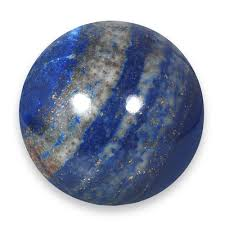



In [0]:
#First we have to import the libraries we need for our exercise. 
import pandas as pd
import folium


In [0]:
#Then we need to read in our first set of data. Here we are reading in the Lapis Lazuli found at Early Bronze Age Sites in this survey
url = "https://raw.githubusercontent.com/Jamie3099/JamieGISWork/master/Copy%20of%20EBA_lapis.csv"
EBA_lapis = pd.read_csv(url)
#.head will show you the first five entries. This can be useful to see if your code is working
EBA_lapis.head()

,FID,Site,Lat,Long,Period,Abs_date,Type,Tot,Comments,Reference
0,0,Tell Abu Salabikh,32.2662,45.0829,ED III,2600-2400 BC,"beads, 1 cylider seal, 5 heads of pins",56,Exact no. of beads in grave 188 not specified...,Postgate 1980: 94; Postgate and Moon 1982: 130...
1,1,Acemhöyük,38.4116,33.8355,EB IIIb,2080-1930 cal BC,bead,1,,Öztan and Arbuckle 2013: 279
2,2,Bab edh-Dhra,31.2532,35.5332,EB II-III,2800-2400 BC,beads,some,,Sowada 2009: 94-95
3,3,Bozüyük,39.8991,30.0295,late EBA,2400-1950 BC,macehead,1,"described as made of """"blauem Stein (Lapis laz...","Koerte 1899: 16, pl.IV.2"
4,4,Byblos (Gubla),34.1174,35.6608,Ur III,2100-2000 BC,"cylinder seal, 1bead (?)",1(2?),,Dunand 1939: pl.125:4183; Tufnell and Ward 196...


In [0]:
#Now we make our map. 
location = EBA_lapis['Lat'].mean(), EBA_lapis['Long'].mean()
m = folium.Map(location=location,zoom_start=6)
#Here we are adding a marker for each site in this dataset and also a popup telling us the name of our site. 
#You can change the popup for any header in the data that you think would be relevant for your map 
for i in range(0,len(EBA_lapis)):
    folium.Marker([EBA_lapis['Lat'].iloc[i],EBA_lapis['Long'].iloc[i]],
    popup=EBA_lapis.iloc[i]['Site']
    ).add_to(m)
m    

In [0]:
#Now we are reading in data that shows the Lapis Lazuli in Middle Bronze Age sites. 
#The process is the same as before but make sure to give the file a different name. I have given it 'MBA_lapis'. 
url2 = "https://raw.githubusercontent.com/Jamie3099/JamieGISWork/master/Copy%20of%20MBA_lapis.csv"

MBA_lapis = pd.read_csv(url2)
MBA_lapis.head()

,FID,Site,Lat,Long,Period,Abs_date,Type,Tot,Comments,Reference
0,0,Acemhöyük,38.4116,33.8355,late MBA,1800-1700 BC,decoration,1,,Özgüç N. 1976:555-556
1,1,Archanes,35.2745,25.1390,latest EBA/ early MBA,2100-1800 BC,cylinder seal,1,,Colburn 2008:208
2,2,Kültepe (Kanesh),38.8502,35.6353,MBA,1900-1700 BC,"cylinder seal, beads",3,,"Özgüç N. 1968: 70; Özgu¨ç T. 1986: p. 37, Pl. ..."
3,3,Palaikastro,35.1954,26.2756,late MBA,1800-1600 BC,seal,1,probably of local manufacture,Platon et al. 1977: no. 286
4,4,Qal'at Sherqat (Aššur),35.4563,43.2598,MBA,2000-1700 BC,"4 cylinder seals, 1 pair of earrings, beads",not quantifiable,Exact no. of beads not specified in publicat...,"Harper et al. 1995: 50-61; Hockmann 2010: 97, ..."


In [0]:
#Now we map the data again. Again same process as for the Early Bronze Age sites. 
location = MBA_lapis['Lat'].mean(), MBA_lapis['Long'].mean()
m = folium.Map(location=location,zoom_start=6)
for i in range(0,len(MBA_lapis)):
    folium.Marker([MBA_lapis['Lat'].iloc[i],MBA_lapis['Long'].iloc[i]],
    popup=MBA_lapis.iloc[i]['Site']
    ).add_to(m)
m   

In [0]:
#Now we need a few folium tools for the next part so we will import them into our notebook 
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MeasureControl
from folium.plugins import HeatMapWithTime

In [0]:
#In this step we are using the command pd.concat
#This command 'concatenates' the two datasets. Essentially it means joining one dataset on the bottom of another.  
Lapis_combined = pd.concat([EBA_lapis,MBA_lapis])
Lapis_combined.head()

,FID,Site,Lat,Long,Period,Abs_date,Type,Tot,Comments,Reference
0,0,Tell Abu Salabikh,32.2662,45.0829,ED III,2600-2400 BC,"beads, 1 cylider seal, 5 heads of pins",56,Exact no. of beads in grave 188 not specified...,Postgate 1980: 94; Postgate and Moon 1982: 130...
1,1,Acemhöyük,38.4116,33.8355,EB IIIb,2080-1930 cal BC,bead,1,,Öztan and Arbuckle 2013: 279
2,2,Bab edh-Dhra,31.2532,35.5332,EB II-III,2800-2400 BC,beads,some,,Sowada 2009: 94-95
3,3,Bozüyük,39.8991,30.0295,late EBA,2400-1950 BC,macehead,1,"described as made of """"blauem Stein (Lapis laz...","Koerte 1899: 16, pl.IV.2"
4,4,Byblos (Gubla),34.1174,35.6608,Ur III,2100-2000 BC,"cylinder seal, 1bead (?)",1(2?),,Dunand 1939: pl.125:4183; Tufnell and Ward 196...


In [0]:
#This small but important step makes sure your map is centered in the centre of your combined survey data
#It takes the mean of your latitude and longitude co-ordinates to do this
location_survey=Lapis_combined['Lat'].mean(), Lapis_combined['Long'].mean()
#Now print to make sure it has worked
print(location_survey)

(35.64333797731708, 37.69298821585366)


In [0]:
#We now need to make a basemap for our data to go on to. 
#Use the co-ordinates generated above to do that
def generateBaseMap(default_location=[35.64333797731708, 37.69298821585366], default_zoom_start=6):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [0]:
#Generate the base map
base_map = generateBaseMap()
base_map

In [0]:
#In this cell we are making Heat Maps but one for each period we are looking at
eba = HeatMap(EBA_lapis[['Lat', 'Long']].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(), radius=20, max_zoom=20).add_to(base_map)
mba = HeatMap(MBA_lapis[['Lat', 'Long', ]].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(), radius= 20, max_zoom=20).add_to(base_map)
#Give your layers sensible names
eba.layer_name = 'Early Bronze Age Lapis Lazuli'
mba.layer_name = 'Middle Bronze Age Lapis Lazuli'
#This makes the user able to control what layer of the map is visible to them
folium.LayerControl().add_to(base_map)

In [0]:
#Generate the map
base_map

In [0]:
#To make it easier to visualise changes from the Early Bronze Age to the Middle Bronze Age we could make a Dual Map
#Import the tool from folium
from folium.plugins import DualMap

In [0]:
#Here we need to declare we are making a new map. We also need to set a location and a starting zoom
m = plugins.DualMap(location=location_survey, tiles=None, zoom_start=6)

#Dual Map generates two buddy maps but in this step we are giving the user a bit of freedom in the type of map seen.
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)

#Add your data to the two layers like before. 
#However this time put one in m1 (the left map) and another in m2 (the right map)
eba = HeatMap(EBA_lapis[['Lat', 'Long']].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(), radius=20, max_zoom=20).add_to(m.m1)
mba = HeatMap(MBA_lapis[['Lat', 'Long', ]].groupby(['Lat', 'Long']).sum().reset_index().values.tolist(), radius=20, max_zoom=20).add_to(m.m2)

#Again give your layers sensible names
eba.layer_name = 'Early Bronze Age Distribution'
mba.layer_name = 'Middle Bronze Age Distribution'

folium.LayerControl(collapsed=False).add_to(m)

#This adds a measure control tool to the top right of the map
m.add_child(MeasureControl())

#Generate then maps
m

Going through this notebook we have seen how the distribution of lapis lazuli has changed from the Early Bronze Age to the Middle Bronze Age. Lapis lazuli is heavily associated with elite classes in Mesopotamia and due to it being imported from Afghanistan we can see centres of trade from the distribution. This shows a use of land as an a trade route and perhaps a centre of trade.   

### Questions to think about:

 ### 1. What could this tell us about social stratification?
 ### 2. What can this tell us about settlement patterns? Are there less people living in the region or is it a nucleation of sites?